<a href="https://colab.research.google.com/github/Kushcodingexe/Data-Science-FDS-Course/blob/main/Kush_Sahni_2210110371_FDS_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sns.set(style="ticks")

df = pd.read_csv("Iris.csv")
df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].apply(pd.to_numeric, errors='coerce')
df['Species'] = df.get('Species', pd.Series()).astype('category') if 'Species' in df.columns else df.get('Species', None)
print(df.shape); display(df.head()); print("Nulls:\n", df.isnull().sum())



(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Nulls:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
#1
display(df.head(10))


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
#2
print(df.dtypes)
print("\nNon-numeric samples:")
for c in df.select_dtypes(['object','category']).columns: print(c, "->", df[c].unique()[:5])


Id                  int64
SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

Non-numeric samples:
Species -> ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Categories (3, object): ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


In [ ]:
#3
print(df['Species'].value_counts() if 'Species' in df.columns else "No Species column")


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [ ]:
#4
print(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].describe().T)


               count      mean       std  min  25%   50%  75%  max
SepalLengthCm  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
SepalWidthCm   150.0  3.054000  0.433594  2.0  2.8  3.00  3.3  4.4
PetalLengthCm  150.0  3.758667  1.764420  1.0  1.6  4.35  5.1  6.9
PetalWidthCm   150.0  1.198667  0.763161  0.1  0.3  1.30  1.8  2.5


In [ ]:
#5: Unique PetalWidthCm values and range
col = 'PetalWidthCm'
if col in df.columns:
    unique_vals = np.sort(df[col].unique())
    print(f"Unique values in '{col}' ({len(unique_vals)} values):")
    print(unique_vals)
    print()
    print(f"Min = {df[col].min()}, Max = {df[col].max()}, Range = {df[col].max() - df[col].min()}")
    print(f"Mean = {df[col].mean():.4f}, Median = {df[col].median():.4f}, Std = {df[col].std():.4f}")
    # Short comment printed programmatically
    print("\nCommentary:")
    print(f" - The PetalWidthCm values lie between {df[col].min()} and {df[col].max()}.")
    print(" - There are discrete repeated values (typical for measurement rounded to one decimal).")
else:
    print(f"Column '{col}' not found.")


Unique values in 'PetalWidthCm' (22 values):
[0.1 0.2 0.3 0.4 0.5 0.6 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.5]

Min = 0.1, Max = 2.5, Range = 2.4
Mean = 1.1987, Median = 1.3000, Std = 0.7632

Commentary:
 - The PetalWidthCm values lie between 0.1 and 2.5.
 - There are discrete repeated values (typical for measurement rounded to one decimal).


In [ ]:
#6
df[['PetalWidthCm','PetalLengthCm']].groupby('PetalWidthCm', as_index=True).mean().rename(columns={'PetalLengthCm':'AvgPetalLength'}).sort_index()


,AvgPetalLength
PetalWidthCm,
0.1,1.416667
0.2,1.442857
0.3,1.428571
0.4,1.571429
0.5,1.700000
0.6,1.600000
1.0,3.628571
1.1,3.566667
1.2,4.240000


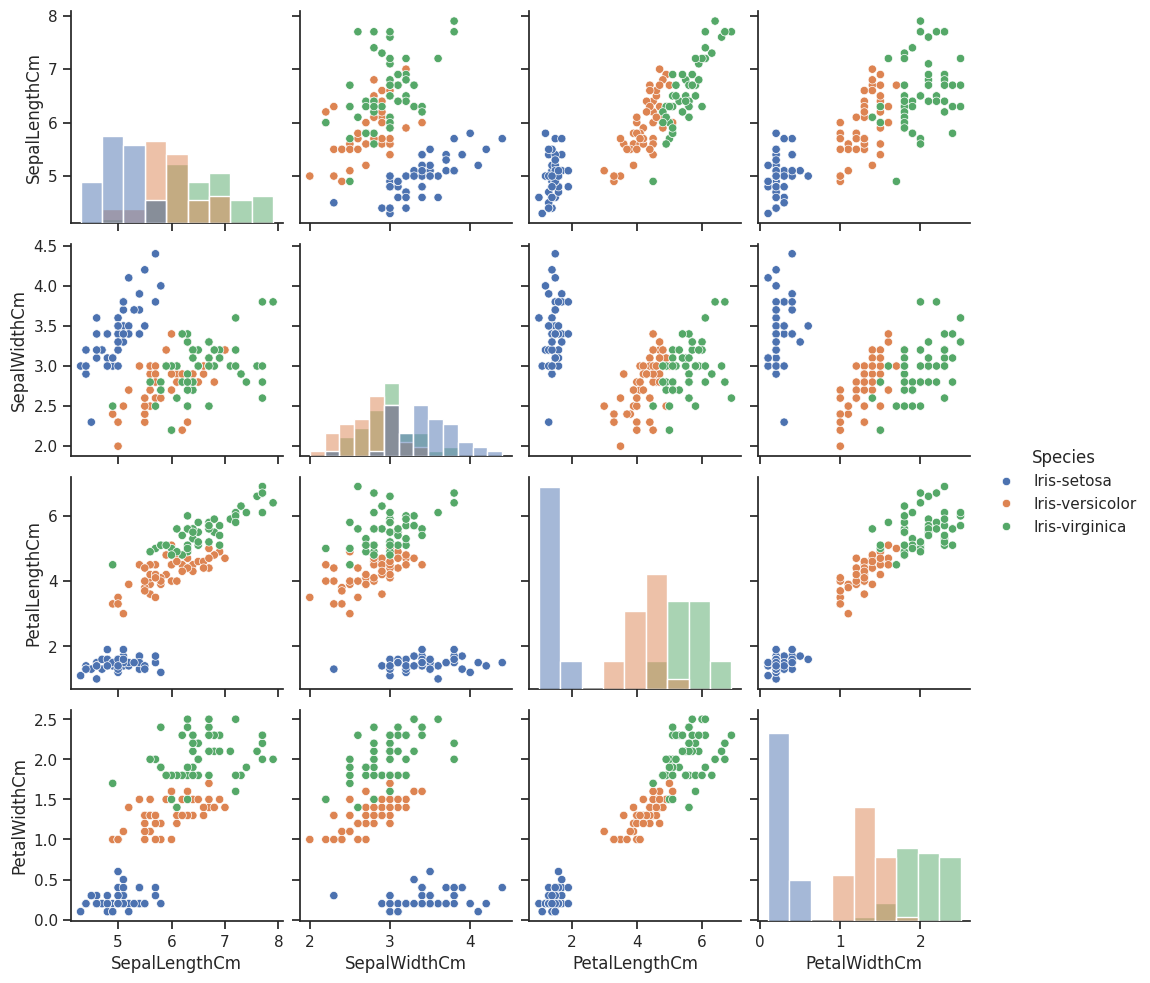

In [ ]:
#7
sns.pairplot(df, vars=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'], hue='Species' if 'Species' in df.columns else None, diag_kind='hist'); plt.show()


/tmp/ipython-input-363106380.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for sp,grp in df.groupby('Species'):


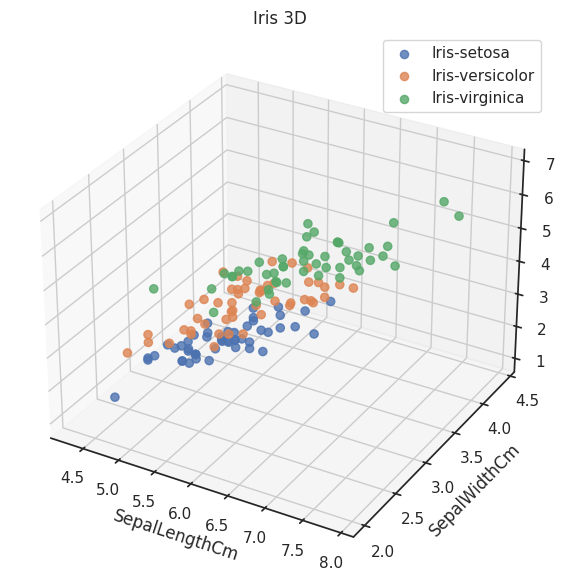

In [ ]:
#8
fig = plt.figure(figsize=(9,7)); ax = fig.add_subplot(111, projection='3d')
cols = ('SepalLengthCm','SepalWidthCm','PetalLengthCm')
for sp,grp in df.groupby('Species'):
    ax.scatter(grp[cols[0]], grp[cols[1]], grp[cols[2]], label=sp, s=35, alpha=0.8)
ax.set_xlabel(cols[0]); ax.set_ylabel(cols[1]); ax.set_zlabel(cols[2]); ax.set_title("Iris 3D"); ax.legend(); plt.show()


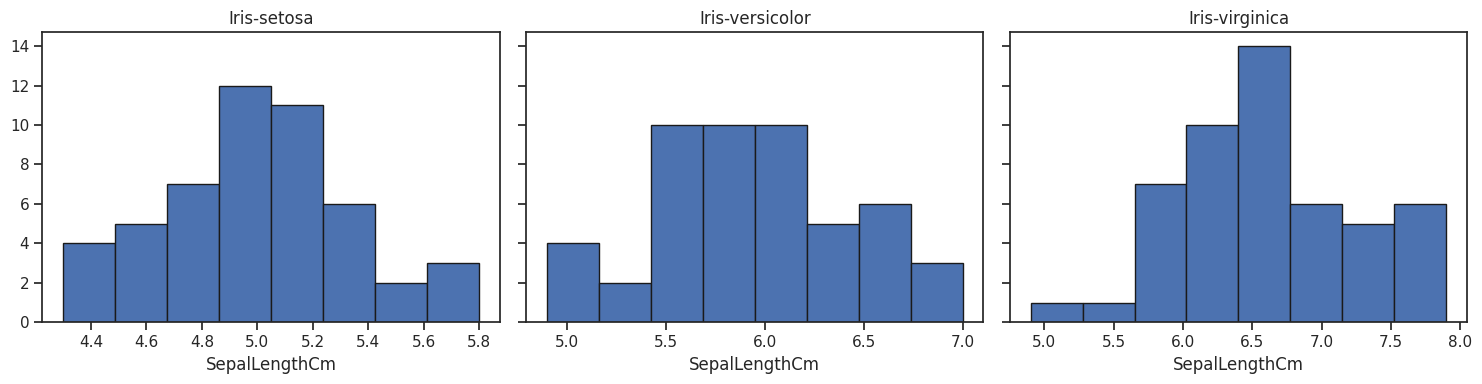

In [ ]:
#9
if 'Species' in df.columns:
    species = df['Species'].cat.categories if hasattr(df['Species'],'cat') else df['Species'].unique()
    fig,axs = plt.subplots(1,len(species),figsize=(5*len(species),4),sharey=True)
    for a,sp in zip(np.atleast_1d(axs), species): a.hist(df.loc[df['Species']==sp,'SepalLengthCm'], bins=8, edgecolor='k'); a.set_title(sp); a.set_xlabel('SepalLengthCm')
    plt.tight_layout(); plt.show()
else:
    plt.hist(df['SepalLengthCm'], bins=10, edgecolor='k'); plt.show()


In [ ]:
#10
col='SepalLengthCm'
print("Mean:", df[col].mean(), "Median:", df[col].median(), "Mode:", df[col].mode().tolist())


Mean: 5.843333333333334 Median: 5.8 Mode: [5.0]


In [ ]:
#11
res = df.groupby('Species')['PetalLengthCm'].mean().sort_values(ascending=False)
print(res); print("\nLongest average petal length:", res.index[0], "->", res.iloc[0])


Species
Iris-virginica     5.552
Iris-versicolor    4.260
Iris-setosa        1.464
Name: PetalLengthCm, dtype: float64

Longest average petal length: Iris-virginica -> 5.5520000000000005


/tmp/ipython-input-156157680.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  res = df.groupby('Species')['PetalLengthCm'].mean().sort_values(ascending=False)
